### Step 1: Import Required Libraries 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Sklearn Imports
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

### Step 2: Read in csv (data) file

In [3]:
# Reading from csv as a pandas dataframe 
df = pd.read_csv('sample_data.csv')
print("Length of dataframe is:", len(df))

Length of dataframe is: 6539


### Step 3: Cleaning the dataframe

In [4]:
# Viewing total columns of the dataframe
df.columns.tolist()

['entity',
 'formattype',
 'fromdate',
 'titlecount',
 'titles',
 'todate',
 'author',
 'amazontotalreviews',
 'minappleprice',
 'amazontotalrevenue',
 'accruedpreordersoldunits',
 'amazonlumpedpreordersubscriptionrevenue',
 'preordersalesrevenue',
 'foundatamazon',
 'barnesandnobleaccruedpreorderrevenue',
 'amazonpreordersubscriptionunits',
 'amazonlumpedpreordersalesrevenue',
 'foundatbarnesandnoble',
 'maxprice',
 'lumpedpreordersubscriptionunits',
 'applepreorderrevenue',
 'amazontotalunits',
 'totalrevenue',
 'barnesandnobleaccruedpreorderunits',
 'preorderunits',
 'amazonsubscriptionrevenue',
 'amazonlumpedpreorderrevenue',
 'maxbarnesandnoblelistprice',
 'maxlistprice',
 'barnesandnoblesoldunits',
 'maxapplelistprice',
 'amazonaccruedpreordersubscriptionrevenue',
 'accruedpreordersubscriptionunits',
 'amazonkenpread',
 'applesoldunits',
 'minamazonlistprice',
 'minprice',
 'bookscanreported',
 'appleaccruedpreorderunits',
 'preorderperiod',
 'datepublished',
 'lumpedpreordersold

In [5]:
# Stats of the dataframe
df.describe()

,fromdate,titlecount,todate,amazontotalreviews,minappleprice,amazontotalrevenue,accruedpreordersoldunits,amazonlumpedpreordersubscriptionrevenue,preordersalesrevenue,foundatamazon,...,preorderrevenue,pubtrackreported,lumpedpreorderrevenue,amazonsoldunits,amazonpreordersubscriptionrevenue,preordersubscriptionunits,amazonpreordersalesrevenue,maxappleprice,pagelength,pricewassetbypublisher
count,6.539000e+03,6539.000000,6.539000e+03,6522.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.000000,6539.000000,...,6539.000000,6539.000000,6539.000000,6539.000000,6539.0,6539.0,6539.000000,6539.000000,2558.000000,1531.0
mean,2.018078e+07,1.599174,2.018080e+07,242.896044,118.859459,18074.906866,0.235204,0.0,155.503288,0.998165,...,155.503288,0.984095,155.503288,17.666004,0.0,0.0,155.503288,118.859459,336.532447,1.0
std,7.319859e+03,0.748654,7.321285e+03,57.042772,323.464108,30999.078107,2.776806,0.0,8769.366153,0.042803,...,8769.366153,0.125116,8769.366153,36.272170,0.0,0.0,8769.366153,323.464108,42.531144,0.0
min,2.017040e+07,1.000000,2.017040e+07,120.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,305.000000,1.0
25%,2.017121e+07,1.000000,2.017121e+07,200.000000,0.000000,1998.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,320.000000,1.0
50%,2.018071e+07,1.000000,2.018071e+07,250.000000,0.000000,7191.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,6.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
75%,2.019013e+07,2.000000,2.019013e+07,283.000000,0.000000,17982.000000,0.000000,0.0,0.000000,1.000000,...,0.000000,1.000000,0.000000,13.000000,0.0,0.0,0.000000,0.000000,321.000000,1.0
max,2.019083e+07,4.000000,2.019083e+07,331.000000,999.000000,571692.000000,82.000000,0.0,501420.000000,1.000000,...,501420.000000,1.000000,501420.000000,781.000000,0.0,0.0,501420.000000,999.000000,496.000000,1.0


In [6]:
# Checking all the Null entries in the datafame
not_null_values = []
for col in df.columns:
    tmp = df[col].isnull().sum()
    if tmp != 0: not_null_values.append((col,tmp))
    print(col,tmp)    

entity 0
formattype 0
fromdate 0
titlecount 0
titles 0
todate 0
author 0
amazontotalreviews 17
minappleprice 0
amazontotalrevenue 0
accruedpreordersoldunits 0
amazonlumpedpreordersubscriptionrevenue 0
preordersalesrevenue 0
foundatamazon 0
barnesandnobleaccruedpreorderrevenue 0
amazonpreordersubscriptionunits 0
amazonlumpedpreordersalesrevenue 0
foundatbarnesandnoble 0
maxprice 0
lumpedpreordersubscriptionunits 0
applepreorderrevenue 0
amazontotalunits 0
totalrevenue 0
barnesandnobleaccruedpreorderunits 0
preorderunits 0
amazonsubscriptionrevenue 0
amazonlumpedpreorderrevenue 0
maxbarnesandnoblelistprice 0
maxlistprice 0
barnesandnoblesoldunits 0
maxapplelistprice 0
amazonaccruedpreordersubscriptionrevenue 0
accruedpreordersubscriptionunits 0
amazonkenpread 0
applesoldunits 0
minamazonlistprice 0
minprice 0
bookscanreported 0
appleaccruedpreorderunits 0
preorderperiod 0
datepublished 0
lumpedpreordersoldunits 0
accruedpreorderrevenue 0
maxamazonlistprice 0
amazonaccruedpreorderrevenue 

In [7]:
not_null_values # Column name and how many null entries present in the respective column

[('amazontotalreviews', 17),
 ('amazonaveragerating', 16),
 ('amazoncategories', 5),
 ('formats', 1),
 ('pagelength', 3981),
 ('pricewassetbypublisher', 5008),
 ('barnesandnobledistributor', 4804),
 ('appledistributor', 5783)]

In [8]:
# Creatign a new dataframe of only Null values 
df_null_entries = df[[item[0] for item in not_null_values]]

In [9]:
df_null_entries.head(10)

,amazontotalreviews,amazonaveragerating,amazoncategories,formats,pagelength,pricewassetbypublisher,barnesandnobledistributor,appledistributor
0,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
1,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
2,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
3,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
4,306.0,410.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
5,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
6,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
7,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
8,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN
9,307.0,440.0,Books > Books on CD > Mystery & Thrillers ; Bo...,Audio CD,NaN,NaN,NaN,NaN


In [10]:
df_null_entries.describe()

,amazontotalreviews,amazonaveragerating,pagelength,pricewassetbypublisher
count,6522.000000,6523.000000,2558.000000,1531.0
mean,242.896044,453.302162,336.532447,1.0
std,57.042772,13.736645,42.531144,0.0
min,120.000000,410.000000,305.000000,1.0
25%,200.000000,440.000000,320.000000,1.0
50%,250.000000,460.000000,321.000000,1.0
75%,283.000000,470.000000,321.000000,1.0
max,331.000000,470.000000,496.000000,1.0


In [11]:
print("""
Amazon Total Reviews: Replace Null by Mean
Amazon Average Rating: Replace Null by Mode
Page Length: Replace Null by Mean
Price Was Set By Publisher: Replace Null by Mean
Barnes and Noble Distributor: Replace by Mode
Apple Distributor: Replace by Mode
Amazon Category: Replace by Mode
Formats: Replace by Mode
""")


Amazon Total Reviews: Replace Null by Mean
Amazon Average Rating: Replace Null by Mode
Page Length: Replace Null by Mean
Price Was Set By Publisher: Replace Null by Mean
Barnes and Noble Distributor: Replace by Mode
Apple Distributor: Replace by Mode
Amazon Category: Replace by Mode
Formats: Replace by Mode



In [12]:
df['amazontotalreviews'].fillna(df['amazontotalreviews'].mean(), inplace=True)
df['amazonaveragerating'].fillna(df['amazonaveragerating'].mode().iloc[0], inplace=True)
df['pagelength'].fillna(df['pagelength'].mean(), inplace=True)
df['pricewassetbypublisher'].fillna(df['pricewassetbypublisher'].mean(), inplace=True)
df['barnesandnobledistributor'].fillna(df['barnesandnobledistributor'].mode().iloc[0], inplace=True)
df['appledistributor'].fillna(df['appledistributor'].mode().iloc[0], inplace=True)
df['formats'].fillna(df['formats'].mode().iloc[0], inplace=True)
df['amazoncategories'].fillna(df['amazoncategories'].mode().iloc[0], inplace=True)

In [13]:
# Checking for Null values 
for col in df.columns:
    tmp = df[col].isnull().sum()
    print(col,tmp)

entity 0
formattype 0
fromdate 0
titlecount 0
titles 0
todate 0
author 0
amazontotalreviews 0
minappleprice 0
amazontotalrevenue 0
accruedpreordersoldunits 0
amazonlumpedpreordersubscriptionrevenue 0
preordersalesrevenue 0
foundatamazon 0
barnesandnobleaccruedpreorderrevenue 0
amazonpreordersubscriptionunits 0
amazonlumpedpreordersalesrevenue 0
foundatbarnesandnoble 0
maxprice 0
lumpedpreordersubscriptionunits 0
applepreorderrevenue 0
amazontotalunits 0
totalrevenue 0
barnesandnobleaccruedpreorderunits 0
preorderunits 0
amazonsubscriptionrevenue 0
amazonlumpedpreorderrevenue 0
maxbarnesandnoblelistprice 0
maxlistprice 0
barnesandnoblesoldunits 0
maxapplelistprice 0
amazonaccruedpreordersubscriptionrevenue 0
accruedpreordersubscriptionunits 0
amazonkenpread 0
applesoldunits 0
minamazonlistprice 0
minprice 0
bookscanreported 0
appleaccruedpreorderunits 0
preorderperiod 0
datepublished 0
lumpedpreordersoldunits 0
accruedpreorderrevenue 0
maxamazonlistprice 0
amazonaccruedpreorderrevenue 0

In [14]:
print("No Null values prresent anymore")

No Null values prresent anymore


### Step 4: Plotting Graphs/ Data-visulaization

Text(0.5, 1.0, 'Authors vs Preorder Sale Revenue')

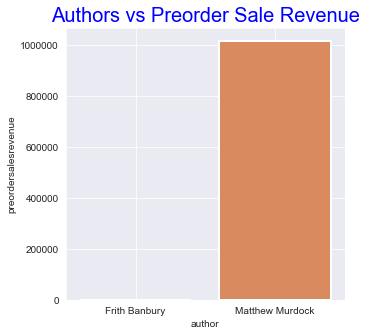

In [15]:
# Author vs Preorder Sale Revenue
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
authors = df.groupby('author')['preordersalesrevenue'].sum().reset_index()
authors['author'] = authors['author'].astype(object)
authors['preordersalesrevenue'] = authors['preordersalesrevenue'].astype(int)
sns.barplot(authors['author'], authors['preordersalesrevenue'],  linewidth = 2,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Preorder Sale Revenue", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Title Count')

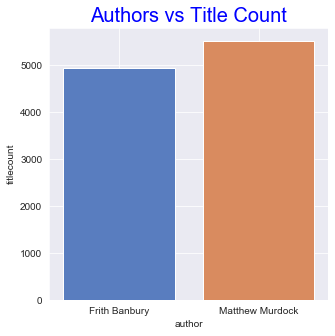

In [16]:
# Author vs Title Count
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
title_count = df.groupby('author')['titlecount'].sum().reset_index()
title_count['author'] = title_count['author'].astype(object)
title_count['titlecount'] = title_count['titlecount'].astype(int)
sns.barplot(title_count['author'], title_count['titlecount'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Title Count", color='b', fontsize = 20, loc = 'center' )

Text(0.5, 1.0, 'Authors vs Found at Amazon')

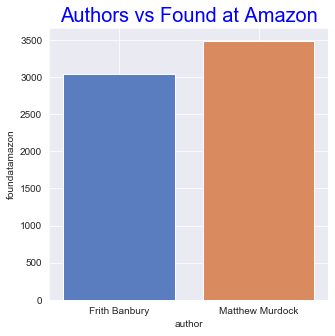

In [17]:
# Author vs Found at Amazon
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_amazon = df.groupby('author')['foundatamazon'].sum().reset_index()
fd_amazon['author'] = fd_amazon['author'].astype(object)
fd_amazon['foundatamazon'] = fd_amazon['foundatamazon'].astype(int)
sns.barplot(fd_amazon['author'], fd_amazon['foundatamazon'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Found at Amazon", color='b', fontsize = 20, loc = 'center')

Text(0.5, 1.0, 'Authors vs Barnes and Noble')

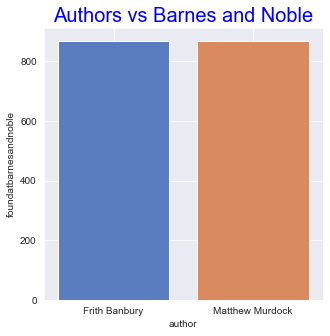

In [18]:
# Author vs Found at Barnes and Noble
plt.figure(figsize = (5,5))
sns.set_style("darkgrid")
fd_BandA = df.groupby('author')['foundatbarnesandnoble'].sum().reset_index()
fd_BandA['author'] = fd_BandA['author'].astype(object)
fd_BandA['foundatbarnesandnoble'] = fd_BandA['foundatbarnesandnoble'].astype(int)
sns.barplot(fd_BandA['author'], fd_BandA['foundatbarnesandnoble'],  linewidth = 1,  palette = "muted")
plt.grid(True)
plt.title("Authors vs Barnes and Noble", color='b', fontsize = 20, loc = 'center')

<Figure size 360x360 with 0 Axes>

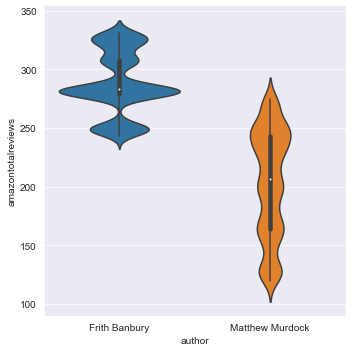

In [19]:
# Author vs Amazon Total Reviews
plt.figure(figsize = (5,5))
sns.catplot(x='author', y='amazontotalreviews', kind = 'violin', data=df)

In [20]:
df['amazontotalreviews'].describe()

count    6539.000000
mean      242.896044
std        56.968563
min       120.000000
25%       200.000000
50%       250.000000
75%       283.000000
max       331.000000
Name: amazontotalreviews, dtype: float64

In [21]:
df['publisherparent'].unique()

array(['Simon & Schuster', 'Pocket',
       'Simon & Schuster Audio and Blackstone Audio'], dtype=object)

In [22]:
df['publishertype'].unique()

array(['bigfive', 'uncategorizedmanyauthor'], dtype=object)

In [23]:
print(df['totalrevenue'].unique()) 
print(df['salesrevenue'].unique())

[    0   702  4914 ... 86528 81835 80340]
[    0   702  4914 ... 38376 43173 39975]


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

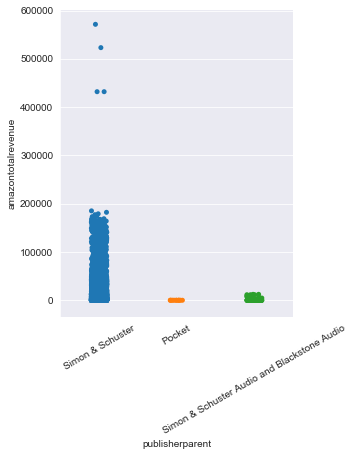

In [24]:
# Publisher Parent vs Amazon Total Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='amazontotalrevenue', kind = 'strip', data=df)
plt.xticks(rotation=30)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

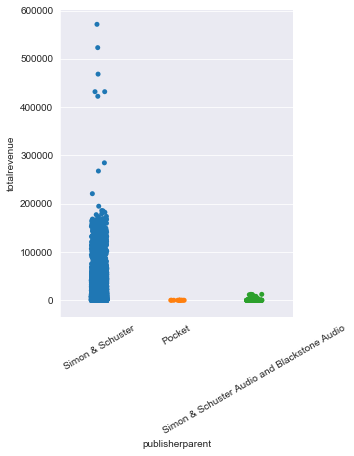

In [25]:
# Publisher Parent vs Total Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='totalrevenue', kind = 'strip', data=df)
plt.xticks(rotation=30)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

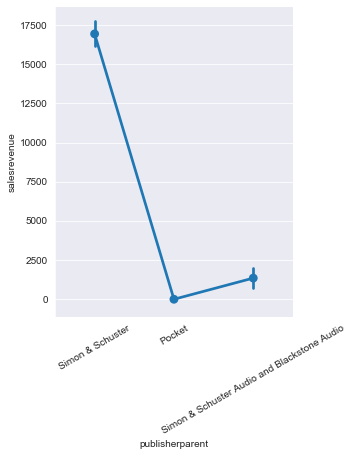

In [26]:
# Publisher Parent vs Sales Revenue
plt.figure(figsize = (20,10))
sns.catplot(x='publisherparent', y='salesrevenue', kind = 'point', data=df)
plt.xticks(rotation=30)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

<Figure size 1440x720 with 0 Axes>

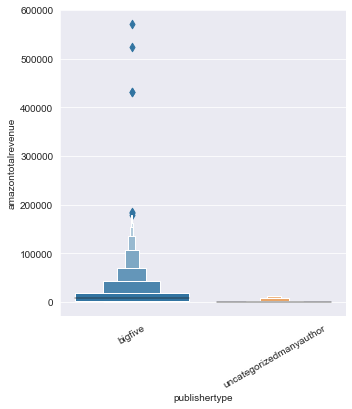

In [27]:
# Publisher Type vs Amazon totalrvenue
plt.figure(figsize = (20,10))
sns.catplot(x='publishertype', y='amazontotalrevenue', kind = 'boxen', data=df)
plt.xticks(rotation=30)

### Step 5: Converting all categorical data to numerical data uing Label Encoder

In [28]:
# Getting location of all categorical columns/ fetaures
    
[df.columns.get_loc(col) for col in df.select_dtypes(include=['object'])]

[0, 1, 4, 6, 40, 57, 61, 70, 78, 104, 105]

In [29]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df.iloc[:,0] = lb.fit_transform(df.iloc[:,0]).astype('float64')
df.iloc[:,1] = lb.fit_transform(df.iloc[:,1]).astype('float64')
df.iloc[:,4] = lb.fit_transform(df.iloc[:,4]).astype('float64')
df.iloc[:,6] = lb.fit_transform(df.iloc[:,6]).astype('float64')
df.iloc[:,40] = lb.fit_transform(df.iloc[:,40]).astype('float64')
df.iloc[:,57] = lb.fit_transform(df.iloc[:,57]).astype('float64')
df.iloc[:,61] = lb.fit_transform(df.iloc[:,61]).astype('float64')
df.iloc[:,70] = lb.fit_transform(df.iloc[:,70]).astype('float64')
df.iloc[:,78] = lb.fit_transform(df.iloc[:,78]).astype('float64')
df.iloc[:,104] = lb.fit_transform(df.iloc[:,104]).astype('float64')
df.iloc[:,105] = lb.fit_transform(df.iloc[:,105]).astype('float64')

### Step 6: Feature Extraction 

In [34]:
print("""
Since there are 106 columns, I'm checking for important features of the dataset. 
All the Tree Based models comes with an inbuilt feature importance class in Scikit-learn. It gives us a score for each feature
and Higher the score more important is the feature.
""")


Since there are 106 columns, I'm checking for important features of the dataset. 
All the Tree Based models comes with an inbuilt feature importance class in Scikit-learn. It gives us a score for each feature
and Higher the score more important is the feature.



### Step 7: Creating Dataset for Model Training

In [31]:
"""
Here I'm considering this as a Classification task. There are 36 unique classess in "Amazon Categories". So this becomes my 
ground truth/ labels/ dependent varible. Rest of the 57 columns are the independent varibales.
"""
y = df.iloc[:,35].values
X = df.drop('amazoncategories',axis=1,inplace=True)
X = df.iloc[:,:].values
#X = df.iloc[:,:].values
print("Shape of X is:", X.shape)
print("Shape of y is:", y.shape)

Shape of X is: (6539, 105)
Shape of y is: (6539,)


In [32]:
def Random_forest_model(X_train, y_train,X_val,y_val,feature_select=False):
    """
    This function uses Random Forest trees for classification
    
    It returns training and validation accurcy of each fold
    """
    np.random.seed(27)
    rf_c = RandomForestClassifier()
    rf_c.fit(X_train,y_train)
    score_train_acc = rf_c.score(X_train, y_train)
    print("**** TRAINING INFORMATION ****")
    print("Training Accuracy: ", score_train_acc)
    if feature_select:
        feat_importances = pd.Series(rf_c.feature_importances_)
        #n_largest = feat_importances.nlargest(30)
        plt.figure(figsize =(25,25))
        feat_importances.nlargest(50).plot(kind='barh')
        plt.show()
    if not feature_select:
        score_val_acc = rf_c.score(X_val, y_val)
        print("**** Validation INFORMATION ****")
        print("Validation Accuracy: ", score_val_acc) 
        print("------------------------------")
        print("------------------------------")
        print("**** Metrics and Scoring ****")
        y_pred_RF = rf_c.predict(X_val)
        print(classification_report(y_val, y_pred_RF)) # Precision, Recall, F1 score, Accuracy
        print(confusion_matrix(y_val, y_pred_RF))
    
    
    if feature_select: return score_train_acc
    else: return score_train_acc, score_val_acc

**** TRAINING INFORMATION ****
Training Accuracy:  0.9995412142529438


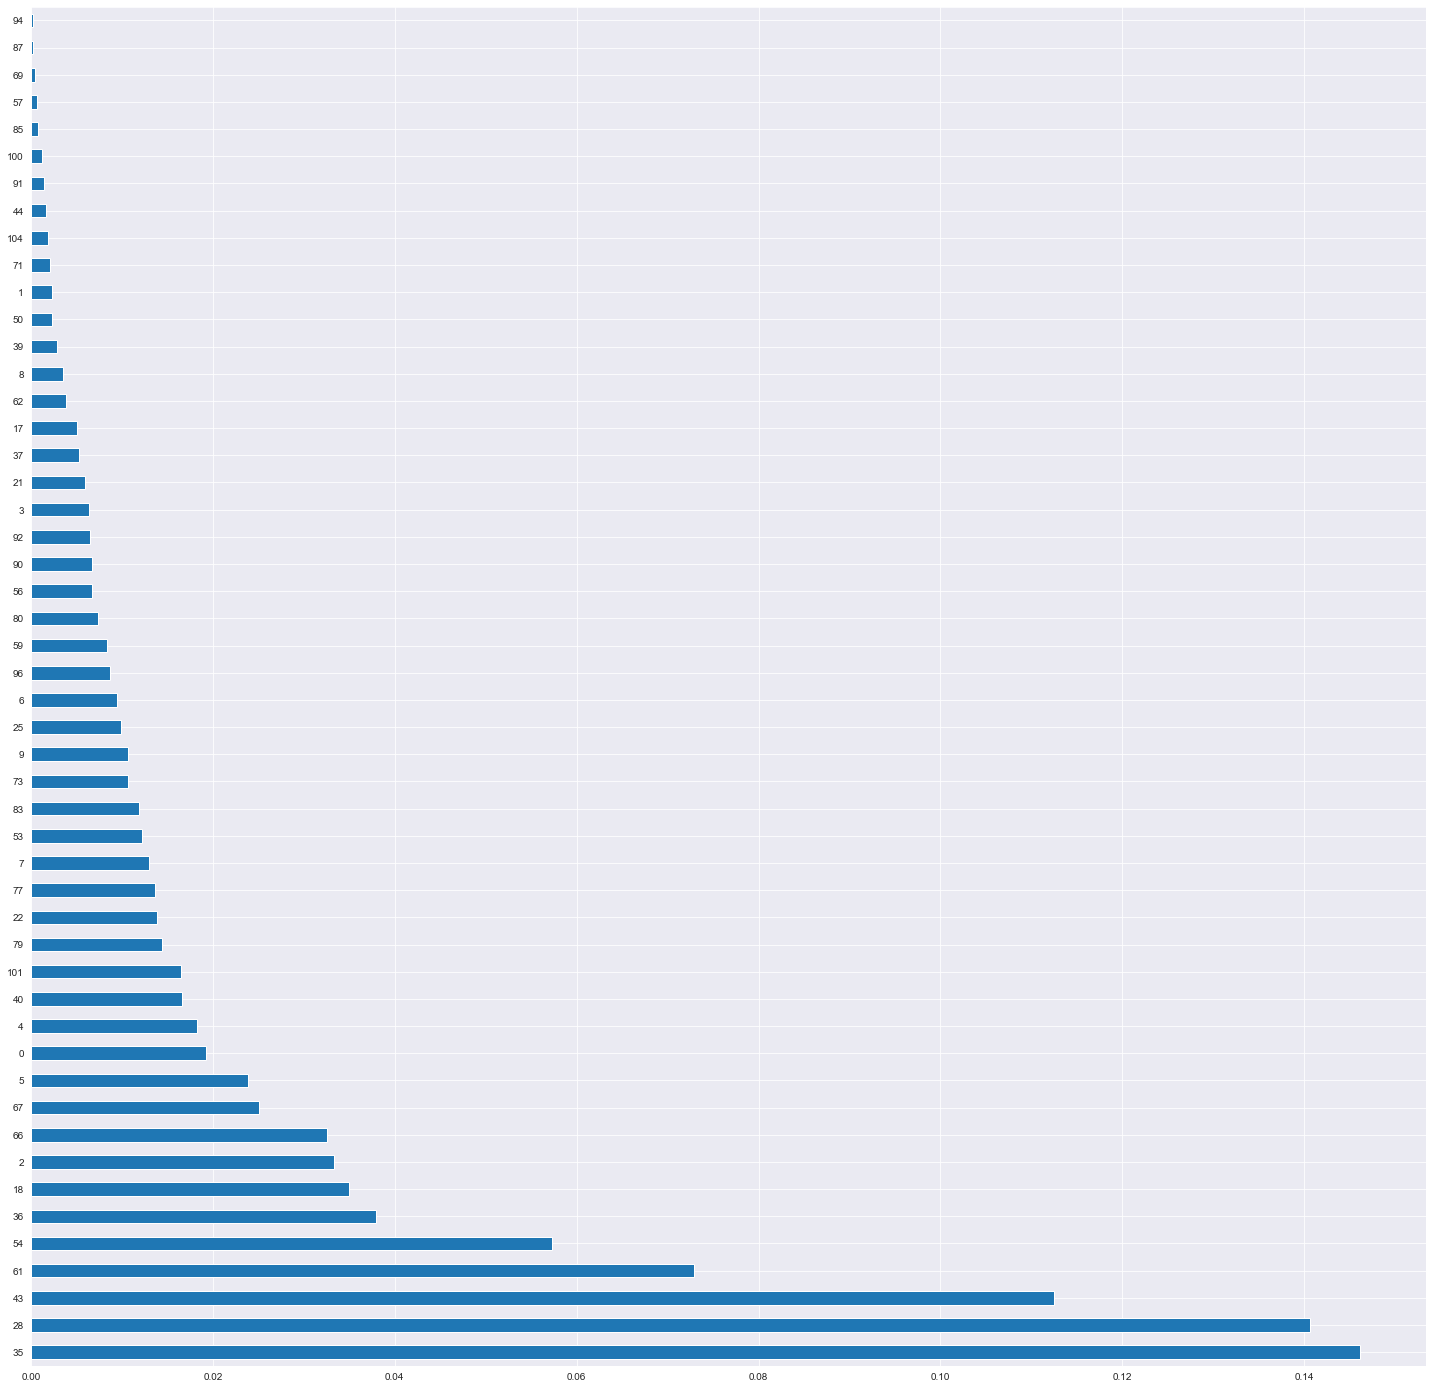

In [33]:
rf_model_feature_select = Random_forest_model(X, y,X_val=None,y_val=None,feature_select=True)